In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Beispiel 1
Hauptachsentransformation zur Entkorrelierung von Datenreihen

#### Datendefinition

In [2]:
all_samples = np.array([2,3,16,10,14,9,23,11,12,8,18,10,6,5]).reshape((7,2))

#### Darstellung Originaldaten

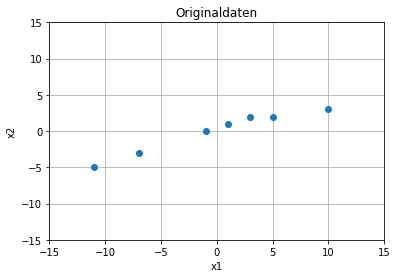

In [17]:
plt.plot(all_samples_mf[:,0],all_samples_mf[:,1], ls='', marker='o')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([-15, 15, -15, 15])
plt.title('Originaldaten')
plt.show()

#### Mittelwertvektor

In [4]:
mean_vector = np.mean(all_samples,axis=0)

In [6]:
all_samples_mf = all_samples - np.hstack(mean_vector)

#### mittelwertfreie Daten

#### Kovarianzmatrix

In [15]:
all_samples_cov = 1/(all_samples.shape[0])*np.dot(np.transpose(all_samples_mf), all_samples_mf)

#### Eigenwerte, Eigenvektoren

In [16]:
all_samples_cov

matrix([[277.39394226,  38.18170767],
        [ 38.18170767,   6.74891489]])

In [10]:
eig_val, eig_vec = np.linalg.eigh(all_samples_cov)
print(eig_val)

[ 0.31438268 50.82847447]


#### Transformationsmatrix

In [11]:
klt = np.append(-eig_vec[1],-eig_vec[0]).reshape(2,2)

In [12]:
klt

array([[ 0.92691115,  0.37528086],
       [-0.37528086,  0.92691115]])

#### transformierte Daten

In [13]:
trans_samples = (np.matrix(klt) * np.matrix(all_samples).T).T
print(trans_samples)

[[ 2.97966488  2.03017172]
 [18.58338697  3.26461768]
 [16.35428382  3.08826826]
 [25.44704586  1.5645628 ]
 [14.12518066  2.91191884]
 [20.43720927  2.51405596]
 [ 7.43787119  2.38287057]]


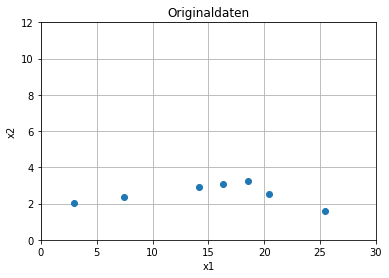

In [14]:
plt.plot(trans_samples[:,0],trans_samples[:,1], ls='', marker='o')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([0, 30, 0, 12])
plt.title('Originaldaten')
plt.show()

#### transformierter Mittelwert

In [ ]:
trans_mean = np.matrix(klt) * np.matrix(mean_vector).T
print(trans_mean)

#### transformierte Kovarianzmatrix

In [ ]:
trans_cov = np.round(np.matrix(klt) * np.matrix(all_samples_cov) * np.matrix(klt).T, 3)
print(trans_cov)

## Beispiel 2
Auswahl signifikanter Merkmale in einfachen Ziffernbildern

In [ ]:
all_samples = np.array([0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,
             1,1,1,1,1,1,0,0,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,
             0,0,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,
             1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1,
             1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,
             1,1,1,1,0,1,1,0,1,1,0,1,1,1,1]).reshape((10,15))

In [ ]:
for i in range(all_samples.shape[0]):
    plt.subplot(2,5,i+1)
    #b1 = np.flipud(np.transpose(num[i,:].reshape((5,3))))
    b1 = np.flipud(np.transpose(all_samples[i,::-1].reshape((5,3))))
    plt.imshow(b1.T, origin='lower', cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

In [ ]:
mean_vector = np.mean(all_samples,axis=0)
print('Mean Vector:\n', mean_vector)

In [ ]:
all_samples_mf = all_samples - np.hstack(mean_vector)
print('Mittelwertfreie Daten:\n', all_samples_mf)

In [ ]:
all_samples_cov = 1/(all_samples.shape[0])*np.dot(np.transpose(all_samples_mf), all_samples_mf)
print('Kovarianzmatrix:\n', all_samples_cov)

In [ ]:
eig_val_cov, eig_vec_cov = np.linalg.eigh(all_samples_cov)
print(np.flip(np.sort(eig_val_cov), axis=0))

In [ ]:
plt.imshow(np.flipud(np.transpose(mean_vector[::-1].reshape((5,3)))).T, origin='lower',
                                  cmap=plt.cm.gray_r, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('Mittelwertbild')
plt.show()

In [ ]:
#eig_pairs = [(eig_vals[i], eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = [(eig_val_cov[i], eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
eig_pairs = sorted(eig_pairs, key=lambda k:k[0], reverse=True)

In [ ]:
for i in range(len(eig_val_cov)):
    eig_vec = eig_pairs[i][1]
    plt.subplot(3,5,i+1)
    #b1 = np.flipud(np.transpose(num[i,:].reshape((5,3))))
    b1 = np.flipud(np.transpose(eig_vec[::-1].reshape((5,3))))
    plt.imshow(b1.T, origin='lower', cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

Sortierte Eigenvektoren werden in Eigenvektormatrix zusammengefasst.

In [ ]:
eig_vec_mat = []
for i in range(len(eig_val_cov)):
    eig_vec_mat.append(eig_pairs[i][1])
#print(eig_vec_mat)

Erste n Eigenvektoren werden ausgewählt.

In [ ]:
n = 15
eig_vec_mat_red = np.array(eig_vec_mat[0:n+1])

In [ ]:
x = np.dot(np.dot(all_samples_mf,np.transpose(eig_vec_mat_red)),eig_vec_mat_red)

In [ ]:
res = x + np.hstack(mean_vector)

In [ ]:
for i in range(res.shape[0]):
    plt.subplot(2,5,i+1)
    #b1 = np.flipud(np.transpose(num[i,:].reshape((5,3))))
    b1 = np.flipud(np.transpose(res[i,::-1].reshape((5,3))))
    plt.imshow(b1.T, origin='lower', cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])